# Dataset Loading

In [158]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# Download dataset
path = kagglehub.dataset_download("equinxx/stock-tweets-for-sentiment-analysis-and-prediction")
print("Path to dataset files:", path)

# List files in the dataset
print("\nFiles in dataset:")
for file in os.listdir(path):
    print(f"  - {file}")

Using Colab cache for faster access to the 'stock-tweets-for-sentiment-analysis-and-prediction' dataset.
Path to dataset files: /kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction

Files in dataset:
  - stock_yfinance_data.csv
  - stock_tweets.csv


In [159]:
# Load datasets
tweets_df = pd.read_csv(f"{path}/stock_tweets.csv")
finance_df = pd.read_csv(f"{path}/stock_yfinance_data.csv")

# EDA

## Basics

In [160]:
# Head
print("\nFinance DataFrame Head:")
display(finance_df.head())

print("\nTweets DataFrame Head:")
display(tweets_df.head())


Finance DataFrame Head:


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA



Tweets DataFrame Head:


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [161]:
# Convert date columns to datetime objects
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.tz_localize(None)
finance_df['Date'] = pd.to_datetime(finance_df['Date']).dt.tz_localize(None)

# Date range verification
print(f"Tweets Date Range: {tweets_df['Date'].min()} to {tweets_df['Date'].max()}")
print(f"Finance Date Range: {finance_df['Date'].min()} to {finance_df['Date'].max()}")

Tweets Date Range: 2021-09-30 00:06:02 to 2022-09-29 23:41:16
Finance Date Range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00


In [162]:
# Stats
print("\nFinance DataFrame Statistics:")
display(finance_df.describe())

print("\nTweets DataFrame Statistics:")
display(tweets_df.describe(include='all'))


Finance DataFrame Statistics:


,Date,Open,High,Low,Close,Adj Close,Volume
count,6300,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6.300000e+03
mean,2022-03-31 02:45:42.857143040,174.748195,177.594589,171.734715,174.657624,173.756012,2.906806e+07
min,2021-09-30 00:00:00,11.050000,11.210000,10.610000,11.060000,10.837500,3.078000e+05
25%,2021-12-29 18:00:00,78.170002,79.891003,76.792501,78.110001,78.110001,5.857700e+06
50%,2022-03-30 12:00:00,145.475128,147.475006,143.501251,145.505005,144.248146,1.518830e+07
75%,2022-06-30 06:00:00,225.665001,230.662498,221.452496,225.785000,225.785000,4.122928e+07
max,2022-09-29 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,3.116452e+08
std,NaN,134.989675,136.795419,133.049955,134.949601,134.582934,3.342181e+07



Tweets DataFrame Statistics:


,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,NaN,64479,25,25
top,NaN,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,NaN,25,37422,37422
mean,2022-03-19 16:12:15.738492160,NaN,NaN,NaN
min,2021-09-30 00:06:02,NaN,NaN,NaN
25%,2021-12-27 19:58:49,NaN,NaN,NaN
50%,2022-03-16 10:44:17,NaN,NaN,NaN
75%,2022-06-04 02:53:54,NaN,NaN,NaN
max,2022-09-29 23:41:16,NaN,NaN,NaN


In [163]:
# Missing values
print("Missing values in Finance Data:")
print(finance_df.isnull().sum())

print("\nMissing values in Tweets Data:")
print(tweets_df.isnull().sum())

Missing values in Finance Data:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64

Missing values in Tweets Data:
Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64


In [164]:
# Duplicate entries
print(f"Duplicate rows in Finance Data: {finance_df.duplicated().sum()}")
print(f"Duplicate rows in Tweets Data: {tweets_df.duplicated().sum()}")

Duplicate rows in Finance Data: 0
Duplicate rows in Tweets Data: 0


In [165]:
# Display duplicate rows in tweets_df
duplicates = tweets_df[tweets_df.duplicated(keep=False)]
print("Sample of Duplicate Tweets:")
display(duplicates.head(10))

# Remove duplicates
tweets_df.drop_duplicates(inplace=True)
print(f"Duplicates removed. New Tweets shape: {tweets_df.shape}")

Sample of Duplicate Tweets:


,Date,Tweet,Stock Name,Company Name


Duplicates removed. New Tweets shape: (80793, 4)


## Visuals

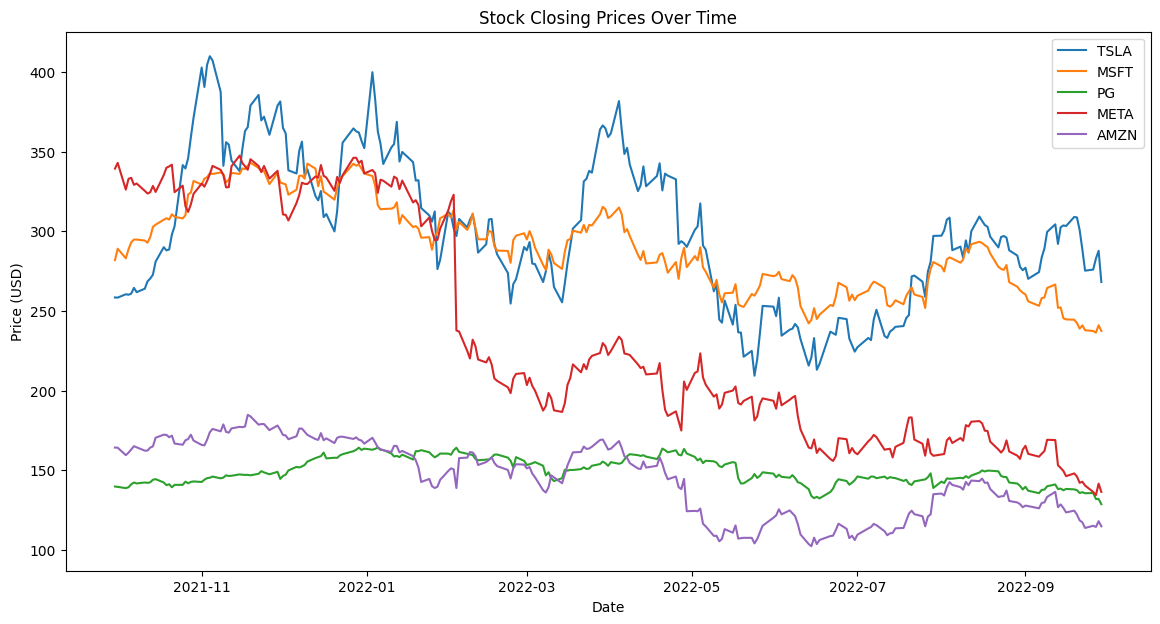

In [166]:
# Visualizing Close prices for major stocks
plt.figure(figsize=(14, 7))
for ticker in finance_df['Stock Name'].unique()[:5]: # Plotting first 5 for clarity
    subset = finance_df[finance_df['Stock Name'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

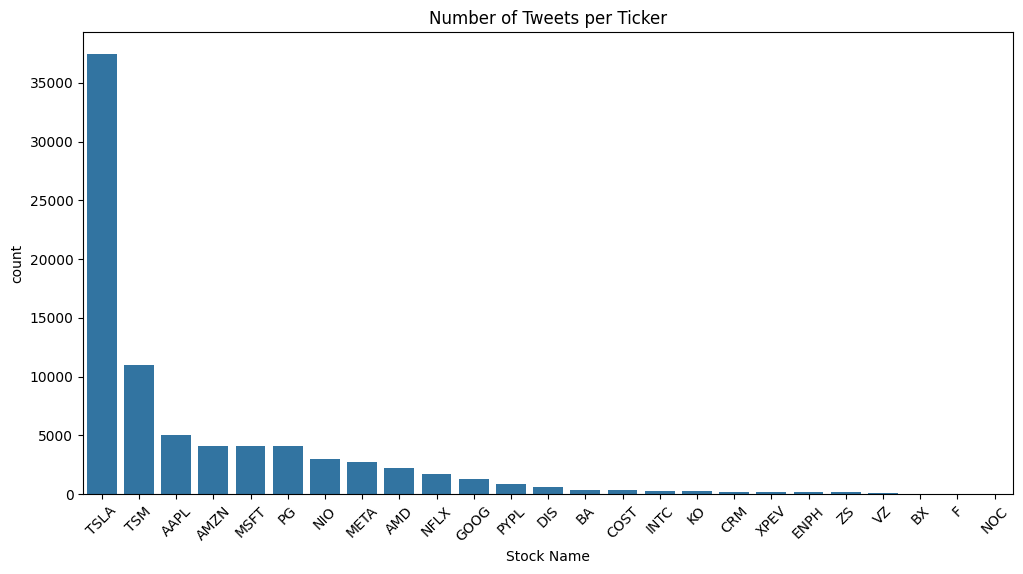

In [167]:
# Frequency of tweets per ticker
plt.figure(figsize=(12, 6))
sns.countplot(data=tweets_df, x='Stock Name', order=tweets_df['Stock Name'].value_counts().index)
plt.title('Number of Tweets per Ticker')
plt.xticks(rotation=45)
plt.show()

In [168]:
# Check for data overlap between datasets
finance_tickers = set(finance_df['Stock Name'].unique())
tweet_tickers = set(tweets_df['Stock Name'].unique())

common_tickers = finance_tickers.intersection(tweet_tickers)
print(f"Tickers present in both datasets: {len(common_tickers)}")
print(f"Tickers: {common_tickers}")

# Check for date alignment per ticker
for ticker in list(common_tickers)[:]:
    f_dates = set(finance_df[finance_df['Stock Name'] == ticker]['Date'].dt.date)
    t_dates = set(tweets_df[tweets_df['Stock Name'] == ticker]['Date'].dt.date)
    intersection = f_dates.intersection(t_dates)
    print(f"Ticker {ticker}: {len(intersection)} overlapping days.")

Tickers present in both datasets: 25
Tickers: {'AMZN', 'F', 'COST', 'NFLX', 'TSM', 'BX', 'ZS', 'DIS', 'AMD', 'KO', 'BA', 'ENPH', 'GOOG', 'INTC', 'AAPL', 'TSLA', 'CRM', 'XPEV', 'PYPL', 'META', 'VZ', 'NOC', 'MSFT', 'NIO', 'PG'}
Ticker AMZN: 252 overlapping days.
Ticker F: 24 overlapping days.
Ticker COST: 157 overlapping days.
Ticker NFLX: 228 overlapping days.
Ticker TSM: 252 overlapping days.
Ticker BX: 29 overlapping days.
Ticker ZS: 102 overlapping days.
Ticker DIS: 184 overlapping days.
Ticker AMD: 249 overlapping days.
Ticker KO: 133 overlapping days.
Ticker BA: 153 overlapping days.
Ticker ENPH: 87 overlapping days.
Ticker GOOG: 238 overlapping days.
Ticker INTC: 133 overlapping days.
Ticker AAPL: 252 overlapping days.
Ticker TSLA: 252 overlapping days.
Ticker CRM: 116 overlapping days.
Ticker XPEV: 93 overlapping days.
Ticker PYPL: 186 overlapping days.
Ticker META: 219 overlapping days.
Ticker VZ: 65 overlapping days.
Ticker NOC: 24 overlapping days.
Ticker MSFT: 252 overlapping

# Pre-processing

## Tweet Sentiment Scoring (3 Options)

### Textblob

In [169]:
'''import re
from textblob import TextBlob

def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)               # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)         # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'\$', '', text)              # Remove stock symbols ($TSLA -> TSLA)
    return text.strip()

# Apply cleaning
tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet)

display(tweets_df[['Tweet', 'Cleaned_Tweet']].head(10))'''

"import re\nfrom textblob import TextBlob\n\ndef clean_tweet(text):\n    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove @mentions\n    text = re.sub(r'#', '', text)               # Remove hashtags\n    text = re.sub(r'RT[\\s]+', '', text)         # Remove RT\n    text = re.sub(r'https?:\\/\\/\\S+', '', text)  # Remove hyperlinks\n    text = re.sub(r'\\$', '', text)              # Remove stock symbols ($TSLA -> TSLA)\n    return text.strip()\n\n# Apply cleaning\ntweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet)\n\ndisplay(tweets_df[['Tweet', 'Cleaned_Tweet']].head(10))"

In [170]:
'''def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Generate sentiment scores (this may take a moment)
tweets_df['Sentiment_Score'] = tweets_df['Cleaned_Tweet'].apply(get_sentiment)

display(tweets_df.head())'''

"def get_sentiment(text):\n    return TextBlob(text).sentiment.polarity\n\n# Generate sentiment scores (this may take a moment)\ntweets_df['Sentiment_Score'] = tweets_df['Cleaned_Tweet'].apply(get_sentiment)\n\ndisplay(tweets_df.head())"

### Vader

In [171]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (required once)
nltk.download('vader_lexicon')

def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)               # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)         # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'\$', '', text)              # Remove stock symbols ($TSLA -> TSLA)
    return text.strip()

# Apply cleaning
tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet)

display(tweets_df[['Tweet', 'Cleaned_Tweet']].head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweet,Cleaned_Tweet
0,Mainstream media has done an amazing job at br...,Mainstream media has done an amazing job at br...
1,Tesla delivery estimates are at around 364k fr...,Tesla delivery estimates are at around 364k fr...
2,3/ Even if I include 63.0M unvested RSUs as of...,3/ Even if I include 63.0M unvested RSUs as of...
3,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,Hahaha why are you still trying to stop Tesla ...
4,"@RealDanODowd @Tesla Stop trying to kill kids,...","Stop trying to kill kids, you sad deranged old..."
5,@RealDanODowd @Tesla This is you https://t.co/...,This is you
6,For years @WholeMarsBlog viciously silenced @T...,For years viciously silenced critics. Failin...
7,$NIO just because I'm down money doesn't mean ...,NIO just because I'm down money doesn't mean t...
8,50 likes for some $SPY $TSLA charts to study!\...,50 likes for some SPY TSLA charts to study!\n\n❤️
9,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,"The powerwalls themselves are waterproof, but ..."


In [172]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    # compound score is a metric that calculates the sum of all the lexicon ratings
    # which have been normalized between -1 (extreme negative) and +1 (extreme positive)
    return analyzer.polarity_scores(text)['compound']

# Generate sentiment scores using VADER
tweets_df['Sentiment_Score'] = tweets_df['Cleaned_Tweet'].apply(get_vader_sentiment)

display(tweets_df[['Tweet', 'Cleaned_Tweet', 'Sentiment_Score']].head(10))

,Tweet,Cleaned_Tweet,Sentiment_Score
0,Mainstream media has done an amazing job at br...,Mainstream media has done an amazing job at br...,0.0772
1,Tesla delivery estimates are at around 364k fr...,Tesla delivery estimates are at around 364k fr...,0.0000
2,3/ Even if I include 63.0M unvested RSUs as of...,3/ Even if I include 63.0M unvested RSUs as of...,0.2960
3,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,Hahaha why are you still trying to stop Tesla ...,-0.7568
4,"@RealDanODowd @Tesla Stop trying to kill kids,...","Stop trying to kill kids, you sad deranged old...",-0.8750
5,@RealDanODowd @Tesla This is you https://t.co/...,This is you,0.0000
6,For years @WholeMarsBlog viciously silenced @T...,For years viciously silenced critics. Failin...,-0.9359
7,$NIO just because I'm down money doesn't mean ...,NIO just because I'm down money doesn't mean t...,0.2500
8,50 likes for some $SPY $TSLA charts to study!\...,50 likes for some SPY TSLA charts to study!\n\n❤️,0.4753
9,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,"The powerwalls themselves are waterproof, but ...",-0.8625


### FinBERT

In [173]:
'''import re

def clean_tweet_minimal(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove Mentions
    text = re.sub(r'@\w+', '', text)
    # Remove the '#' symbol but keep the word
    text = re.sub(r'#', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet_minimal)

display(tweets_df[['Tweet', 'Cleaned_Tweet']].head(10))'''

"import re\n\ndef clean_tweet_minimal(text):\n    # Remove URLs\n    text = re.sub(r'https?://\\S+|www\\.\\S+', '', text)\n    # Remove Mentions\n    text = re.sub(r'@\\w+', '', text)\n    # Remove the '#' symbol but keep the word\n    text = re.sub(r'#', '', text)\n    # Remove extra whitespace\n    text = re.sub(r'\\s+', ' ', text).strip()\n    return text\n\ntweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet_minimal)\n\ndisplay(tweets_df[['Tweet', 'Cleaned_Tweet']].head(10))"

In [174]:
'''from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

# Load model and tokenizer
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def get_finbert_sentiment(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            # FinBERT output: [positive, negative, neutral]
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()

            # Map probabilities to a single score: positive - negative
            scores = probs[:, 0] - probs[:, 1]
            results.extend(scores)
    return results

# Process in batches (select a subset first if testing to save time)
tweets_df['Sentiment_Score'] = get_finbert_sentiment(tweets_df['Cleaned_Tweet'].tolist())'''

'from transformers import AutoTokenizer, AutoModelForSequenceClassification\nimport torch\nimport numpy as np\n\n# Load model and tokenizer\nmodel_name = "ProsusAI/finbert"\ntokenizer = AutoTokenizer.from_pretrained(model_name)\nmodel = AutoModelForSequenceClassification.from_pretrained(model_name)\n\n# Move model to GPU if available\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nmodel.to(device)\n\ndef get_finbert_sentiment(texts, batch_size=32):\n    results = []\n    for i in range(0, len(texts), batch_size):\n        batch = texts[i:i+batch_size]\n        inputs = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)\n\n        with torch.no_grad():\n            outputs = model(**inputs)\n            # FinBERT output: [positive, negative, neutral]\n            probs = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()\n\n            # Map probabilities to a single score: positive - negative\n            scores = pr

## Feature Engineering

Merge Datasets

In [175]:
# Standardize to date-only format and roll weekend tweets forward to the next business day (Monday) using BDay(0)
tweets_df['Date_Only'] = (pd.to_datetime(tweets_df['Date']) + pd.offsets.BDay(0)).dt.date
finance_df['Date_Only'] = pd.to_datetime(finance_df['Date']).dt.date

# Calculate daily mean sentiment per stock
daily_sentiment = tweets_df.groupby(['Stock Name', 'Date_Only'])['Sentiment_Score'].mean().reset_index()

# Merge datasets on Stock Name and Date
final_df = pd.merge(finance_df, daily_sentiment,
                    on=['Stock Name', 'Date_Only'],
                    how='inner')

Create Target Label

In [176]:
# Enforce chronological order for time-series target generation
final_df = final_df.sort_values(['Stock Name', 'Date_Only'])

# Add temporary target column using 'Adj Close'; Shift tomorrow's adjusted price to today's row
final_df['Target_Next_Adj_Close'] = final_df.groupby('Stock Name')['Adj Close'].shift(-1)

# Create the target label (1 = Up, 0 = Down/Stable)
final_df['Price_Direction'] = (final_df['Target_Next_Adj_Close'] > final_df['Adj Close']).astype(int)

# Drop last row for each ticker and the temporary column
final_df = final_df.dropna(subset=['Target_Next_Adj_Close'])
final_df = final_df.drop(columns=['Target_Next_Adj_Close'])

display(final_df.head())
print(f"Final DataFrame shape: {final_df.shape}")

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Date_Only,Sentiment_Score,Price_Direction
1719,2021-09-30,143.660004,144.380005,141.279999,141.500000,140.478485,89056700,AAPL,2021-09-30,0.098900,1
1720,2021-10-01,141.899994,142.919998,139.110001,142.649994,141.620163,94639600,AAPL,2021-10-01,0.291891,0
1721,2021-10-04,141.759995,142.210007,138.270004,139.139999,138.135513,98322000,AAPL,2021-10-04,0.135900,1
1722,2021-10-05,139.490005,142.240005,139.360001,141.110001,140.091278,80861100,AAPL,2021-10-05,0.331000,1
1723,2021-10-06,139.470001,142.149994,138.369995,142.000000,140.974869,83221100,AAPL,2021-10-06,0.243520,1


Final DataFrame shape: (4311, 11)


In [177]:
# Manual Sanity Check

# Check a specific date for AAPL
test_ticker = 'AAPL'
test_date = pd.to_datetime('2021-10-01').date()

# Verify sentiment aggregation
print("Sentiment for AAPL on 2021-10-01:")
display(tweets_df[(tweets_df['Stock Name'] == test_ticker) &
                  (tweets_df['Date_Only'] == test_date)]['Sentiment_Score'].mean())

# Verify financial merge
print("\nMerged record for AAPL on 2021-10-01:")
display(final_df[(final_df['Stock Name'] == test_ticker) &
                 (final_df['Date_Only'] == test_date)])

Sentiment for AAPL on 2021-10-01:


np.float64(0.2918909090909091)


Merged record for AAPL on 2021-10-01:


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Date_Only,Sentiment_Score,Price_Direction
1720,2021-10-01,141.899994,142.919998,139.110001,142.649994,141.620163,94639600,AAPL,2021-10-01,0.291891,0


Add Indicator Features for better Convergence

In [178]:
# Enforce chronological order
final_df = final_df.sort_values(['Stock Name', 'Date_Only'])

# 1. Moving Averages (MA7 and MA20)
final_df['MA7'] = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.rolling(window=7).mean())
final_df['MA20'] = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.rolling(window=20).mean())

# 2. MACD (Moving Average Convergence Divergence)
ema12 = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
ema26 = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
final_df['MACD'] = ema12 - ema26

# 3. Bollinger Bands (20SD, Upper, and Lower)
final_df['20SD'] = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.rolling(window=20).std())
final_df['upper_band'] = final_df['MA20'] + (final_df['20SD'] * 2)
final_df['lower_band'] = final_df['MA20'] - (final_df['20SD'] * 2)

# 4. EMA (Exponential Moving Average - standard 20-period)
final_df['EMA'] = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: x.ewm(span=20, adjust=False).mean())

# 5. Log Momentum (Log of current price / price n-days ago)
# Using 5-day window for momentum
final_df['logmomentum'] = final_df.groupby('Stock Name')['Adj Close'].transform(lambda x: np.log(x / x.shift(5)))

# Drop "warm-up" rows where rolling indicators are NaN
final_df = final_df.dropna()

display(final_df.head())
print(f"Features added. New shape: {final_df.shape}")

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Date_Only,Sentiment_Score,Price_Direction,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
1738,2021-10-27,149.360001,149.729996,148.490005,148.850006,147.775421,56094900,AAPL,2021-10-27,-0.045207,1,147.924340,143.753165,2.016057,3.477665,150.708496,136.797835,144.766211,-0.002751
1739,2021-10-28,149.820007,153.169998,149.720001,152.570007,151.468567,100077900,AAPL,2021-10-28,0.025634,0,148.464696,144.302670,2.294601,3.787471,151.877611,136.727728,145.404530,0.020461
1740,2021-10-29,147.220001,149.940002,146.410004,149.800003,148.718567,124953200,AAPL,2021-10-29,0.212547,0,148.541282,144.657590,2.267311,3.854858,152.367306,136.947874,145.720153,0.007437
1741,2021-11-01,148.990005,149.699997,147.800003,148.960007,147.884644,74588300,AAPL,2021-11-01,0.260404,1,148.467534,145.145046,2.153567,3.594314,152.333675,137.956418,145.926295,0.002151
1742,2021-11-02,148.660004,151.570007,148.649994,150.020004,148.936981,69122000,AAPL,2021-11-02,0.204462,1,148.656163,145.587331,2.123857,3.482200,152.551732,138.622931,146.213027,0.004677


Features added. New shape: (3836, 19)


Clean up

In [179]:
# Enforce chronological order
final_df = final_df.sort_values(['Stock Name', 'Date_Only'])

# List columns to remove
cols_to_drop = [
    'Stock Name', 'Date', 'Date_Only','Open', 'High', 'Low', 'Close'
]

# Drop if they exist in dataframe
final_df = final_df.drop(columns=[c for c in cols_to_drop if c in final_df.columns])

print("Columns remaining for model input:")
print(final_df.columns.tolist())

Columns remaining for model input:
['Adj Close', 'Volume', 'Sentiment_Score', 'Price_Direction', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']


Split

In [180]:
# Define X (Features) and y (Target)
X = final_df.drop(columns=['Price_Direction'])
y = final_df['Price_Direction']

# Time-Series Split (80% Train, 20% Test)
split_idx = int(len(X) * 0.8)

# Raw splitting for original feature set
X_train_raw = X.iloc[:split_idx]
X_test_raw = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# Generate raw feature sets without Sentiment_Score
X_train_raw_no_sent = X_train_raw.drop(columns=['Sentiment_Score'])
X_test_raw_no_sent = X_test_raw.drop(columns=['Sentiment_Score'])

Scale

In [181]:
from sklearn.preprocessing import StandardScaler

# Scaler for original dataset (includes sentiment)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Scaler for dataset excluding sentiment
scaler_no_sent = StandardScaler()
X_train_no_sent = scaler_no_sent.fit_transform(X_train_raw_no_sent)
X_test_no_sent = scaler_no_sent.transform(X_test_raw_no_sent)

print(f"Full feature sets: X_train {X_train.shape}, X_test {X_test.shape}")
print(f"No-sentiment sets: X_train_no_sent {X_train_no_sent.shape}, X_test_no_sent {X_test_no_sent.shape}")

Full feature sets: X_train (3068, 11), X_test (768, 11)
No-sentiment sets: X_train_no_sent (3068, 10), X_test_no_sent (768, 10)


# Training

## ML Models

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model initialization factory to ensure identical parameters
def initialize_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

# Dictionary to store models trained WITH sentiment
models_with_sent = initialize_models()
for name, model in models_with_sent.items():
    model.fit(X_train, y_train)

# Dictionary to store models trained WITHOUT sentiment
models_no_sent = initialize_models()
for name, model in models_no_sent.items():
    model.fit(X_train_no_sent, y_train)

In [183]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

evaluation = []

# Evaluate models with sentiment
for name, model in models_with_sent.items():
    y_pred = model.predict(X_test)
    evaluation.append({
        "Model": name, "Sentiment": "With",
        "Accuracy": accuracy_score(y_test, y_pred), "F1": f1_score(y_test, y_pred)
    })

# Evaluate models without sentiment
for name, model in models_no_sent.items():
    y_pred = model.predict(X_test_no_sent)
    evaluation.append({
        "Model": name, "Sentiment": "Without",
        "Accuracy": accuracy_score(y_test, y_pred), "F1": f1_score(y_test, y_pred)
    })

print(pd.DataFrame(evaluation).to_string(index=False))

              Model Sentiment  Accuracy       F1
Logistic Regression      With  0.536458 0.156398
      Random Forest      With  0.507812 0.398089
            XGBoost      With  0.509115 0.426180
Logistic Regression   Without  0.536458 0.148325
      Random Forest   Without  0.501302 0.459803
            XGBoost   Without  0.493490 0.416792


## DL Models

Pre-process for 3D Input

In [184]:
import numpy as np

def create_sequences(data, target, window_size=20):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i : (i + window_size)])
        y_seq.append(target.iloc[i + window_size])
    return np.array(X_seq), np.array(y_seq)

# Windowing for datasets with sentiment
X_train_dl, y_train_dl = create_sequences(X_train, y_train)
X_test_dl, y_test_dl = create_sequences(X_test, y_test)

# Windowing for datasets without sentiment
X_train_no_sent_dl, _ = create_sequences(X_train_no_sent, y_train)
X_test_no_sent_dl, _ = create_sequences(X_test_no_sent, y_test)

print(f"DL Input Shape (With Sent): {X_train_dl.shape}")

DL Input Shape (With Sent): (3048, 20, 11)


Model 1: Dual-Branch TCN-LSTM Hybrid

In [185]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_tcn_lstm(input_shape):
    inputs = layers.Input(shape=input_shape)

    # TCN Branch: Dilated Convolutions for local patterns
    tcn = layers.Conv1D(filters=64, kernel_size=3, dilation_rate=1, padding='causal', activation='relu')(inputs)
    tcn = layers.Conv1D(filters=64, kernel_size=3, dilation_rate=2, padding='causal', activation='relu')(tcn)
    tcn = layers.GlobalAveragePooling1D()(tcn)

    # LSTM Branch: Long-term dependencies
    lstm = layers.LSTM(64, return_sequences=False)(inputs)

    # Fusion
    merged = layers.Concatenate()([tcn, lstm])
    dense = layers.Dense(32, activation='relu')(merged)
    output = layers.Dense(1, activation='sigmoid')(dense)

    return Model(inputs, output)

model1 = build_tcn_lstm((X_train_dl.shape[1], X_train_dl.shape[2]))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train_dl, y_train_dl, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
model1.save("tcn_lstm_hybrid.keras")

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5172 - loss: 0.6982 - val_accuracy: 0.5508 - val_loss: 0.6872
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5528 - loss: 0.6894 - val_accuracy: 0.5443 - val_loss: 0.6893
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5350 - loss: 0.6899 - val_accuracy: 0.5410 - val_loss: 0.6900
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5293 - loss: 0.6890 - val_accuracy: 0.5508 - val_loss: 0.6855
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5501 - loss: 0.6866 - val_accuracy: 0.5180 - val_loss: 0.6931
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5344 - loss: 0.6914 - val_accuracy: 0.5541 - val_loss: 0.6911
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5610 - loss: 0.6850 - val_accuracy: 0.5344 - val_loss: 0.6907
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5641 - loss: 0.6827 - val_accuracy: 0.5475 - v

Model 2: Relational Temporal Graph Network (Feature-GCN)

In [186]:
def build_feature_gcn(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Permute to treat features as entities for Attention (Simulated Graph Convolution)
    # Shape: (batch, features, time_steps)
    x = layers.Permute((2, 1))(inputs)

    # Multi-Head Attention acts as a fully connected Graph Layer
    query = layers.Dense(input_shape[0])(x)
    key = layers.Dense(input_shape[0])(x)
    value = layers.Dense(input_shape[0])(x)
    gcn_sim = layers.Attention()([query, key, value])

    x = layers.Flatten()(gcn_sim)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    return Model(inputs, output)

model2 = build_feature_gcn((X_train_dl.shape[1], X_train_dl.shape[2]))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_dl, y_train_dl, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
model2.save("feature_gcn_relational.keras")

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4925 - loss: 0.8338 - val_accuracy: 0.5311 - val_loss: 0.7037
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5434 - loss: 0.7199 - val_accuracy: 0.5443 - val_loss: 0.6953
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5818 - loss: 0.6812 - val_accuracy: 0.5377 - val_loss: 0.6963
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5769 - loss: 0.6798 - val_accuracy: 0.5344 - val_loss: 0.6961
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5941 - loss: 0.6621 - val_accuracy: 0.5639 - val_loss: 0.6937
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6105 - loss: 0.6478 - val_accuracy: 0.5508 - val_loss: 0.6955
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6148 - loss: 0.6520 - val_accuracy: 0.5639 - val_loss: 0.6983
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6141 - loss: 0.6409 - val_accuracy: 0.5410 - val_loss:

Model 3: Multi-Modal Transformer Encoder

In [187]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_transformer(input_shape):
    # input_shape is (time_steps, features)
    inputs = layers.Input(shape=input_shape)

    # Corrected key_dim to use the feature dimension (index 1)
    feature_dim = input_shape[1]

    # Transformer Block
    attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
    attn_output = layers.Dropout(0.1)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # Feed Forward
    ffn = layers.Dense(units=feature_dim, activation="relu")(out1)
    ffn = layers.Dense(units=feature_dim)(ffn)
    out2 = layers.LayerNormalization(epsilon=1e-6)(out1 + ffn)

    x = layers.GlobalAveragePooling1D()(out2)
    x = layers.Dense(32, activation="relu")(x)
    output = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs, output)

# Training block for Model 3
model3 = build_transformer((X_train_dl.shape[1], X_train_dl.shape[2]))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train_dl, y_train_dl, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
model3.save("multimodal_transformer.keras")

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5250 - loss: 0.6978 - val_accuracy: 0.5410 - val_loss: 0.6937
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5266 - loss: 0.6916 - val_accuracy: 0.5344 - val_loss: 0.6886
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5276 - loss: 0.6913 - val_accuracy: 0.5541 - val_loss: 0.6907
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5418 - loss: 0.6886 - val_accuracy: 0.5508 - val_loss: 0.6872
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5213 - loss: 0.6911 - val_accuracy: 0.5574 - val_loss: 0.6886
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5460 - loss: 0.6881 - val_accuracy: 0.5475 - val_loss: 0.6878
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5421 - loss: 0.6868 - val_accuracy: 0.5639 - val_loss: 0.6898
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5338 - loss: 0.6914 - val_accuracy: 0.5508 - v

Accuracy and F1

In [188]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Deep Learning model performance evaluation
dl_evaluation = []

# List of trained DL models and their corresponding test sets
dl_models = {
    "TCN-LSTM Hybrid": (model1, X_test_dl),
    "Feature-GCN Relational": (model2, X_test_dl),
    "Multi-Modal Transformer": (model3, X_test_dl)
}

for name, (model, X_input) in dl_models.items():
    # Generate probability predictions
    y_prob = model.predict(X_input)
    # Convert probabilities to binary class labels (threshold 0.5)
    y_pred = (y_prob > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test_dl, y_pred)
    f1 = f1_score(y_test_dl, y_pred)

    dl_evaluation.append({
        "Deep Learning Model": name,
        "Accuracy": f"{accuracy:.4f}",
        "F1 Score": f"{f1:.4f}"
    })

# Present results in tabular format
performance_table = pd.DataFrame(dl_evaluation)
print(performance_table.to_string(index=False))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
    Deep Learning Model Accuracy F1 Score
        TCN-LSTM Hybrid   0.4799   0.4915
 Feature-GCN Relational   0.5187   0.4079
Multi-Modal Transformer   0.5321   0.5014


# Evaluation

Confusion Matrices & Detailed Reports


Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.54      0.92      0.68       414
           1       0.49      0.09      0.16       354

    accuracy                           0.54       768
   macro avg       0.51      0.50      0.42       768
weighted avg       0.52      0.54      0.44       768


Report: Random Forest
               precision    recall  f1-score   support

           0       0.54      0.64      0.58       414
           1       0.46      0.35      0.40       354

    accuracy                           0.51       768
   macro avg       0.50      0.50      0.49       768
weighted avg       0.50      0.51      0.50       768


Report: XGBoost
               precision    recall  f1-score   support

           0       0.54      0.61      0.57       414
           1       0.46      0.40      0.43       354

    accuracy                           0.51       768
   macro avg       0.50      0.50      0.50       768
we

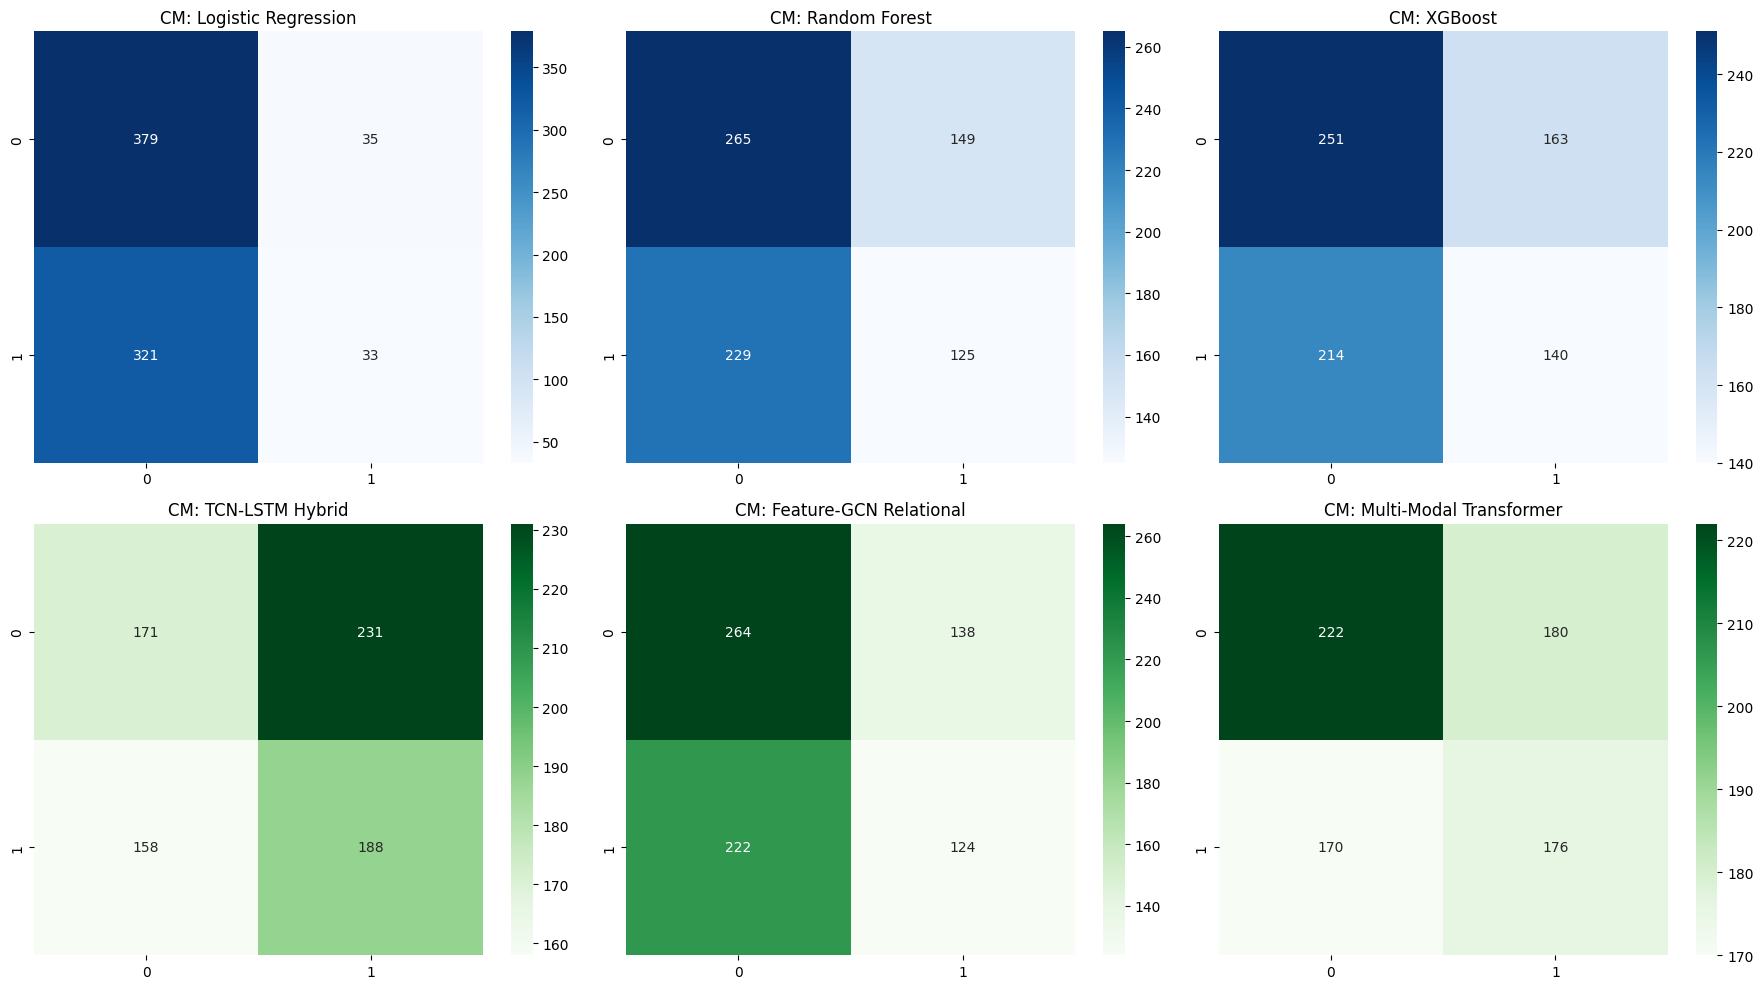

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Collection of all 6 models with sentiment
ml_models = models_with_sent # Logistic Regression, Random Forest, XGBoost
dl_models_dict = {
    "TCN-LSTM Hybrid": (model1, X_test_dl),
    "Feature-GCN Relational": (model2, X_test_dl),
    "Multi-Modal Transformer": (model3, X_test_dl)
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Evaluate ML Models
for i, (name, model) in enumerate(ml_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"CM: {name}")
    print(f"\nReport: {name}\n", classification_report(y_test, y_pred))

# Evaluate DL Models
for i, (name, (model, X_input)) in enumerate(dl_models_dict.items(), start=3):
    y_prob = model.predict(X_input)
    y_pred = (y_prob > 0.5).astype(int)
    cm = confusion_matrix(y_test_dl, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Greens')
    axes[i].set_title(f"CM: {name}")
    print(f"\nReport: {name}\n", classification_report(y_test_dl, y_pred))

plt.tight_layout()
plt.show()

ROC Curves (Comparing Predictive Power)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


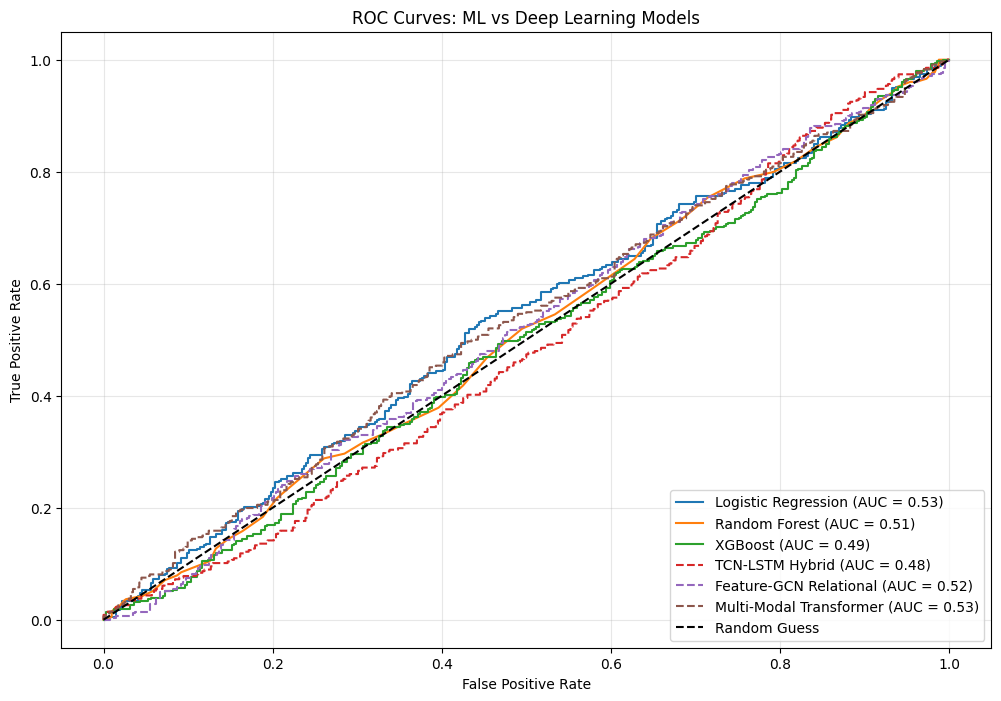

In [190]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# ROC for ML Models
for name, model in ml_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

# ROC for DL Models
for name, (model, X_input) in dl_models_dict.items():
    y_prob = model.predict(X_input).ravel()
    fpr, tpr, _ = roc_curve(y_test_dl, y_prob)
    plt.plot(fpr, tpr, linestyle='--', label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: ML vs Deep Learning Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()